In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

from sqlalchemy import create_engine

import warnings

warnings.filterwarnings('ignore')

# Load the dataset from Thinkful's database. To connect to the database, use these credentials:

* postgres_user = 'dsbc_student'
* postgres_pw = '7*.8G9QH21'
* postgres_host = '142.93.121.174'
* postgres_port = '5432'
* postgres_db = 'heartdisease'

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
heart_df.columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "num",
]

In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The dataset needs some preprocessing. So, before working with the dataset, apply the following code:

* Define the features and the outcome
 X = heartdisease_df.iloc[:, :13]
 y = heartdisease_df.iloc[:, 13]

* Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

* Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 0, 1)
 
Here, X will represent your features and y will hold the labels. If y is equal to 1, that indicates that the corresponding patient has heart disease. And if y is equal to 0, then the patient doesn't have heart disease.

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


# The dataset needs some preprocessing. So, before working with the dataset, apply the following code:

# Define the features and the outcome
* X = heartdisease_df.iloc[:, :13]
* y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
* X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
* y = np.where(y > 0, 0, 1)

In [6]:
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

In [7]:
X = X.replace(to_replace='?', value=0)

In [8]:
y = np.where(y > 0, 0, 1)

# Here, X will represent your features and y will hold the labels. If y is equal to 1, that indicates that the corresponding patient has heart disease. And if y is equal to 0, then the patient doesn't have heart disease.

In [9]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


# To complete this assignment, submit a link to a Jupyter Notebook containing your solutions to the following tasks below. Plan on discussing your solutions with your mentor. You can also take a look at these example solutions.

# 1) Apply DBSCAN to the heart disease dataset by trying different values for the eps and min_samples parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.

In [10]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [11]:
sils = []
aris = []

[[-0.47321535287209326, 1, 2]]
[[-0.008961679875103037, 1, 2]]


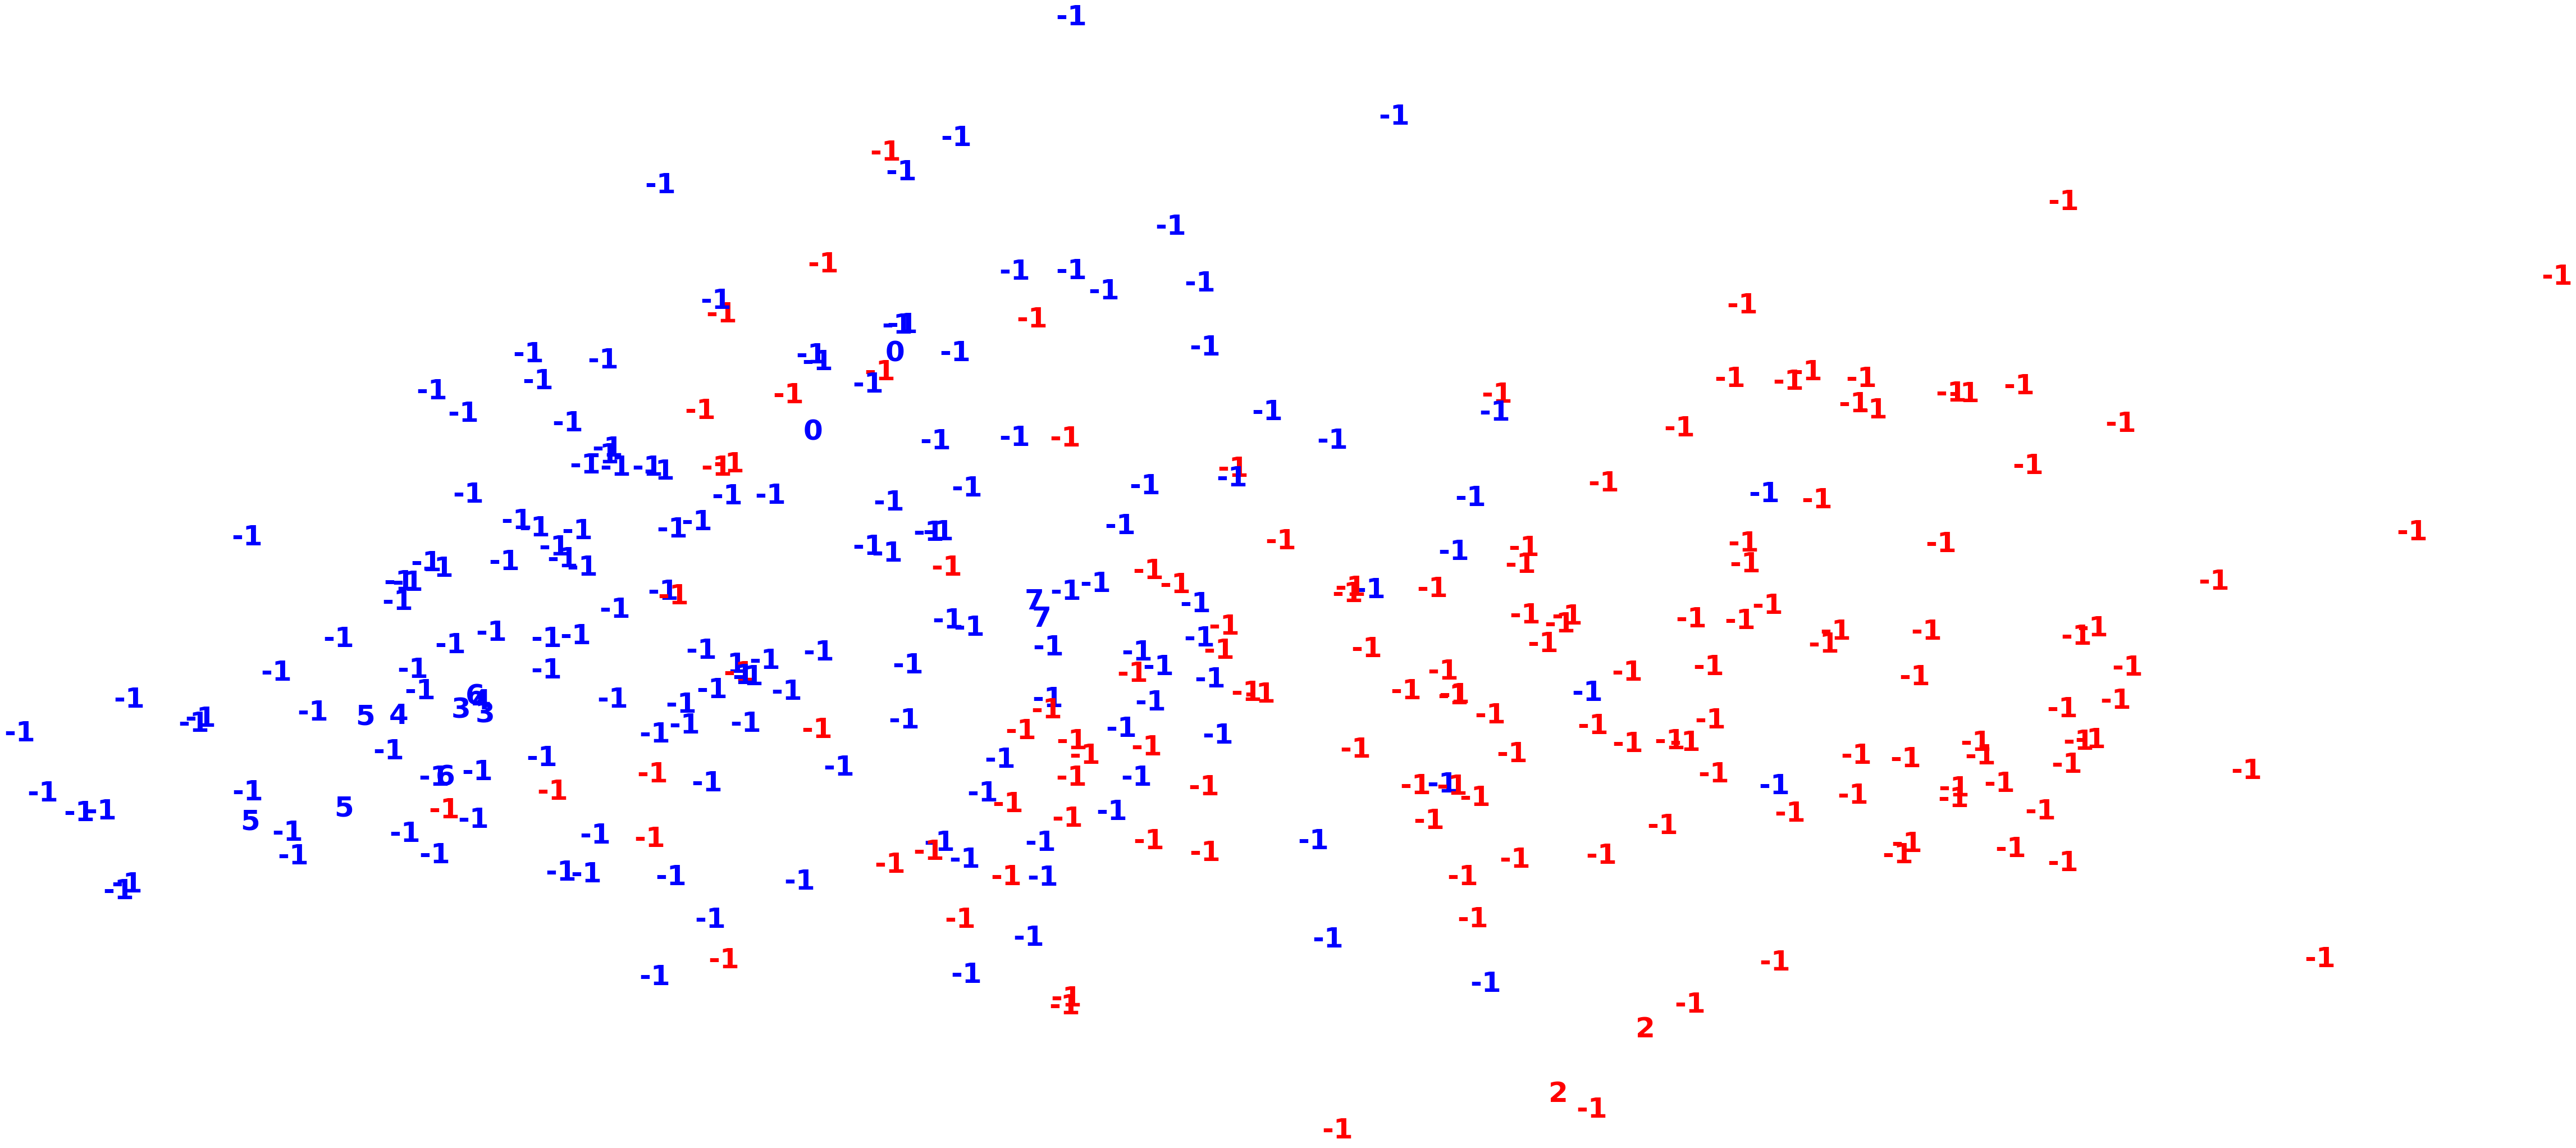

[[-0.47321535287209326, 1, 2], [-0.34987366669853376, 2, 3]]
[[-0.008961679875103037, 1, 2], [0.02347593686222429, 2, 3]]


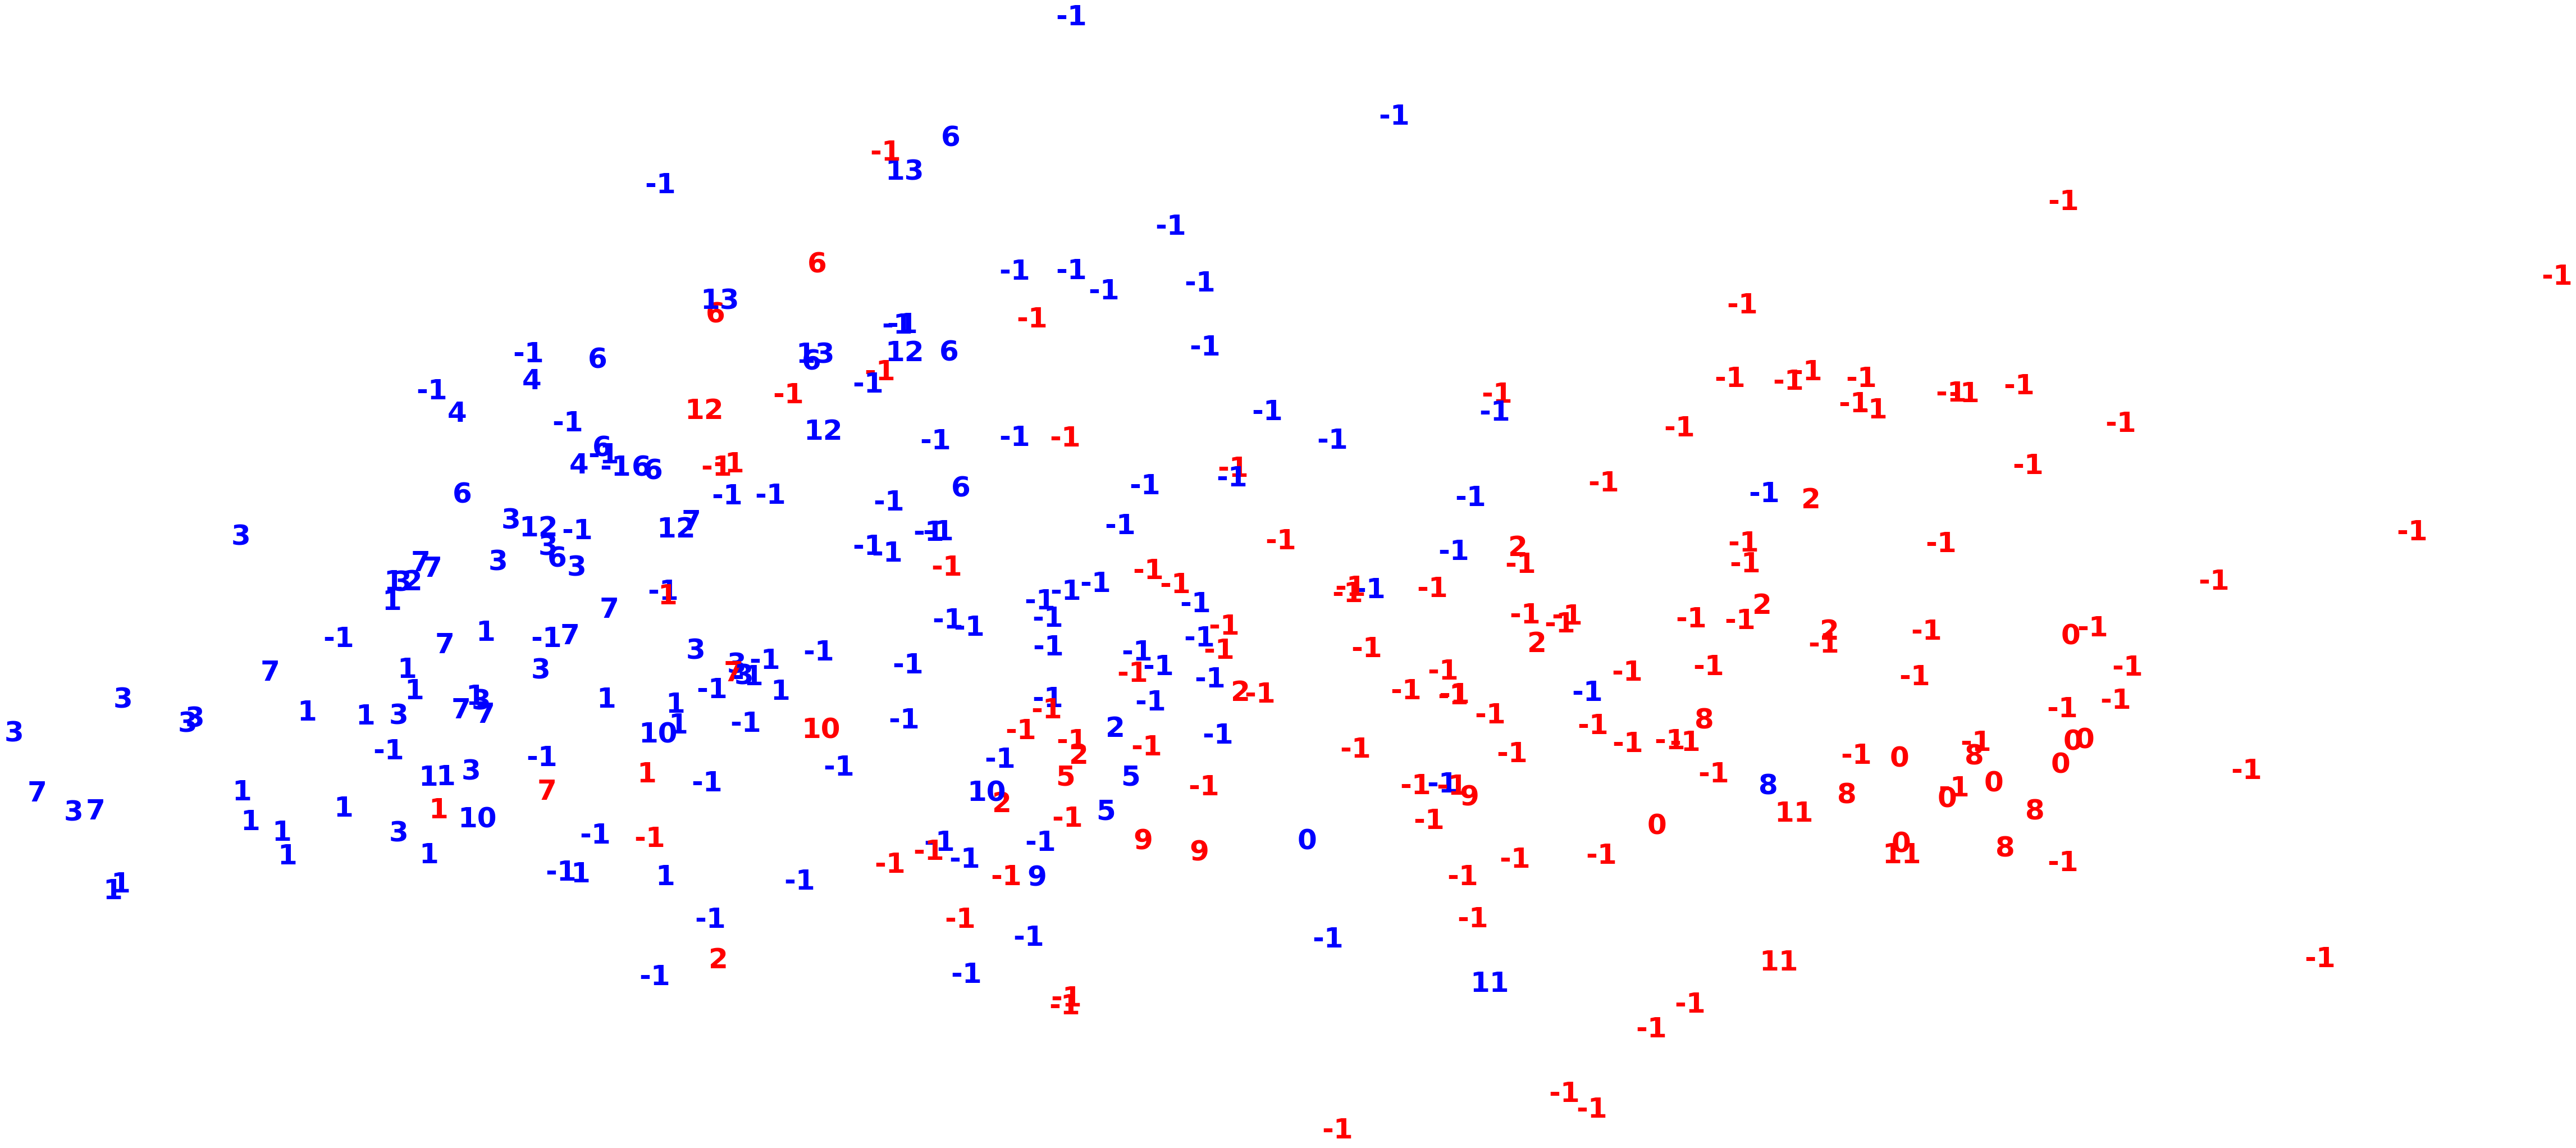

[[-0.47321535287209326, 1, 2], [-0.34987366669853376, 2, 3], [-0.19704175109981706, 3, 4]]
[[-0.008961679875103037, 1, 2], [0.02347593686222429, 2, 3], [0.018784313764717165, 3, 4]]


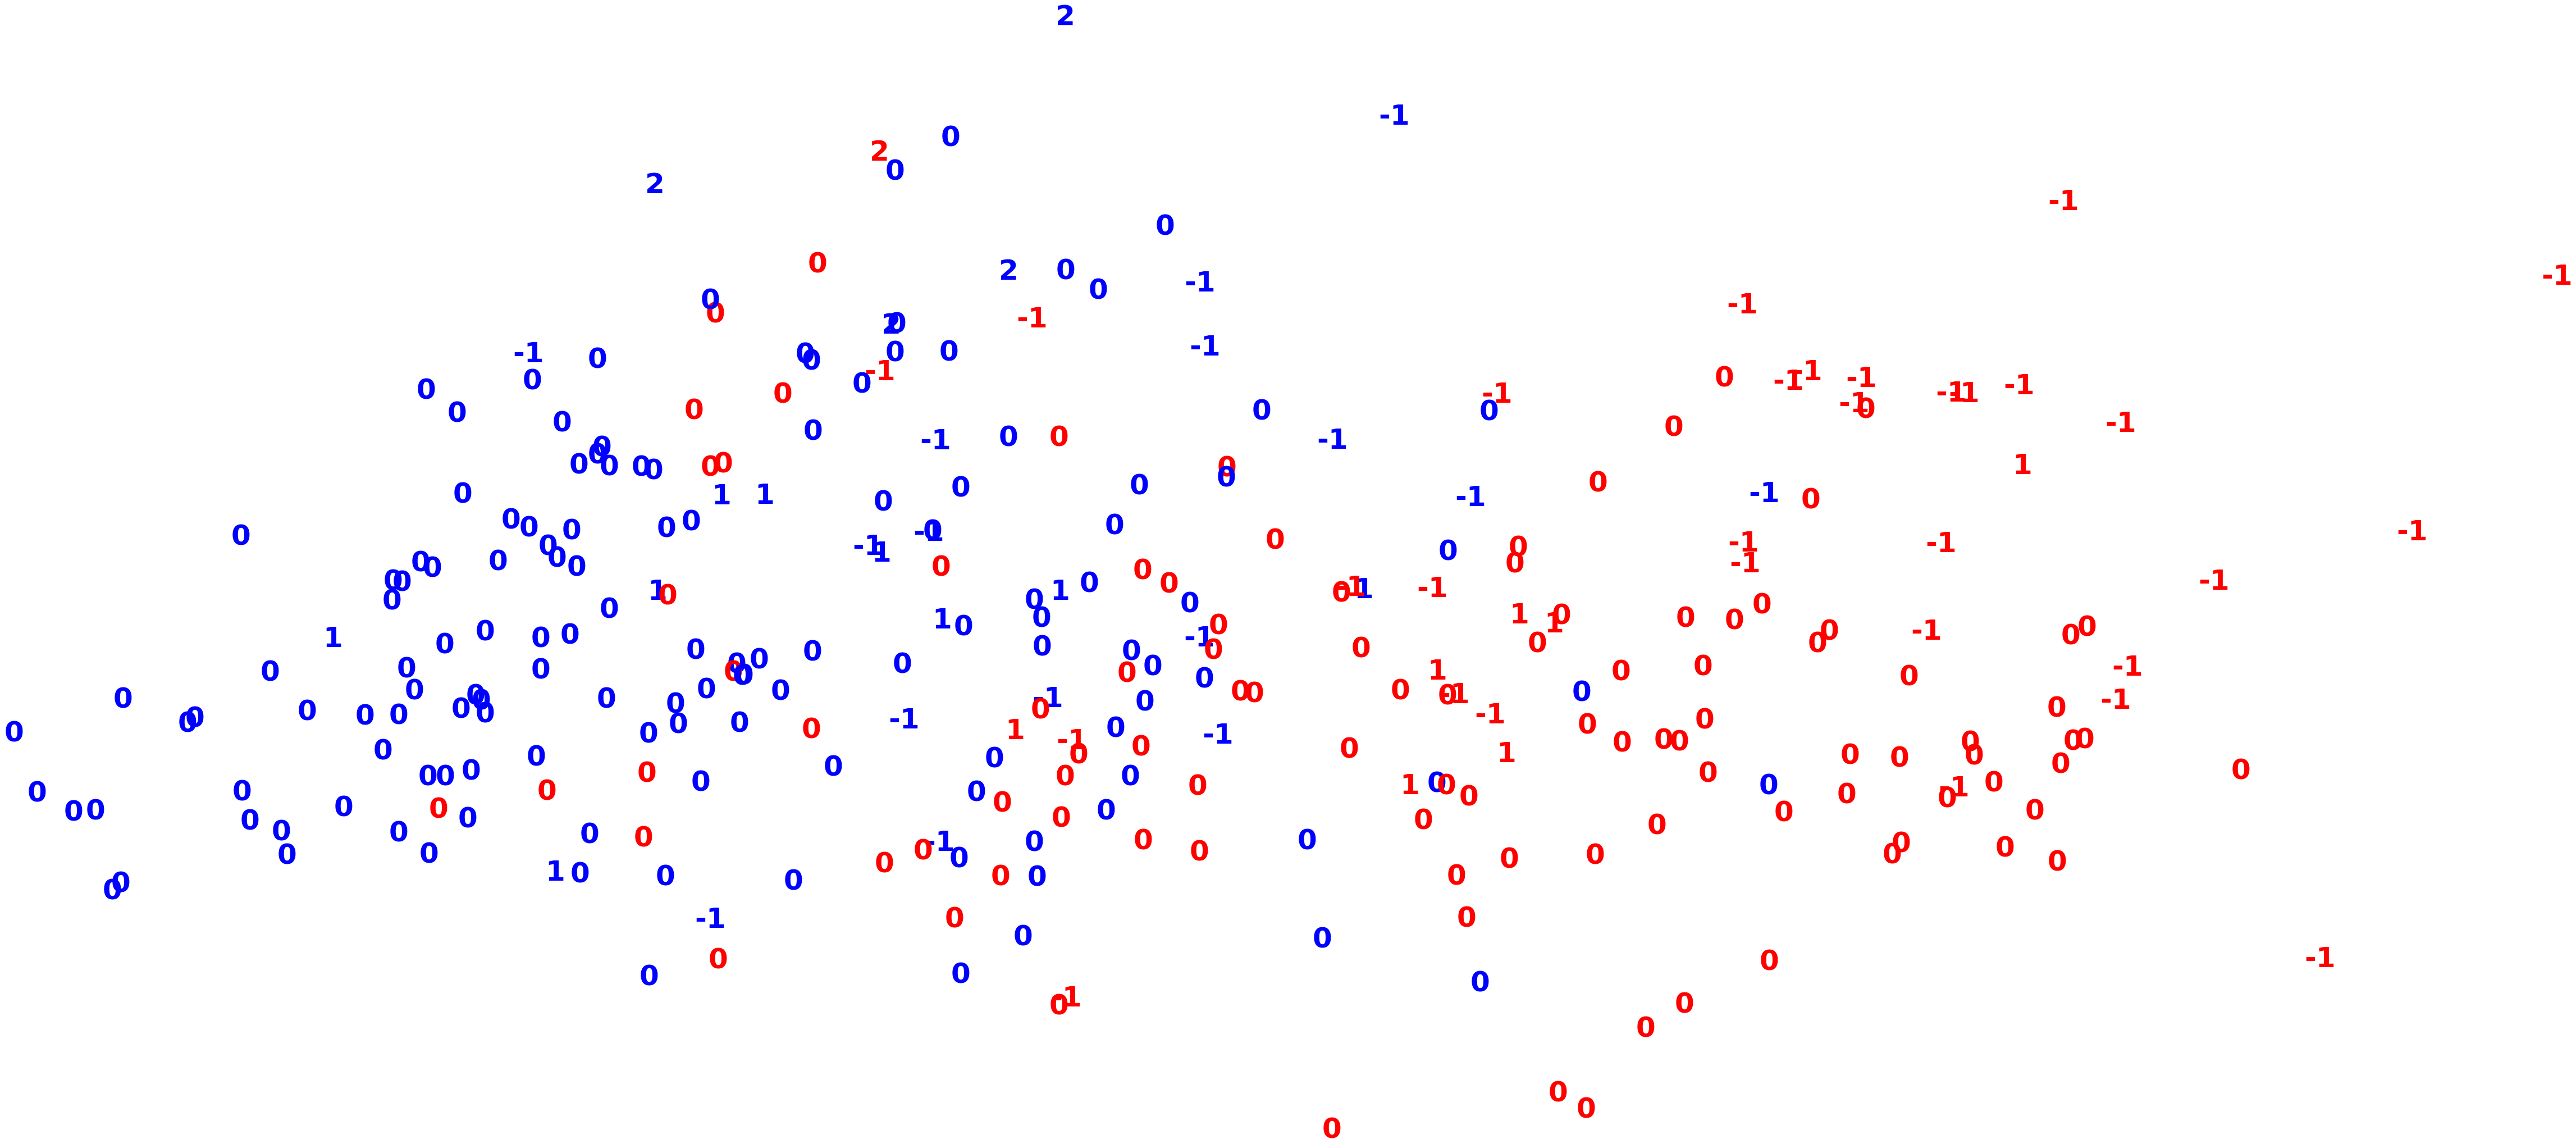

[[-0.47321535287209326, 1, 2], [-0.34987366669853376, 2, 3], [-0.19704175109981706, 3, 4], [0.6484534366294585, 4, 5]]
[[-0.008961679875103037, 1, 2], [0.02347593686222429, 2, 3], [0.018784313764717165, 3, 4], [9.291884165897093e-05, 4, 5]]


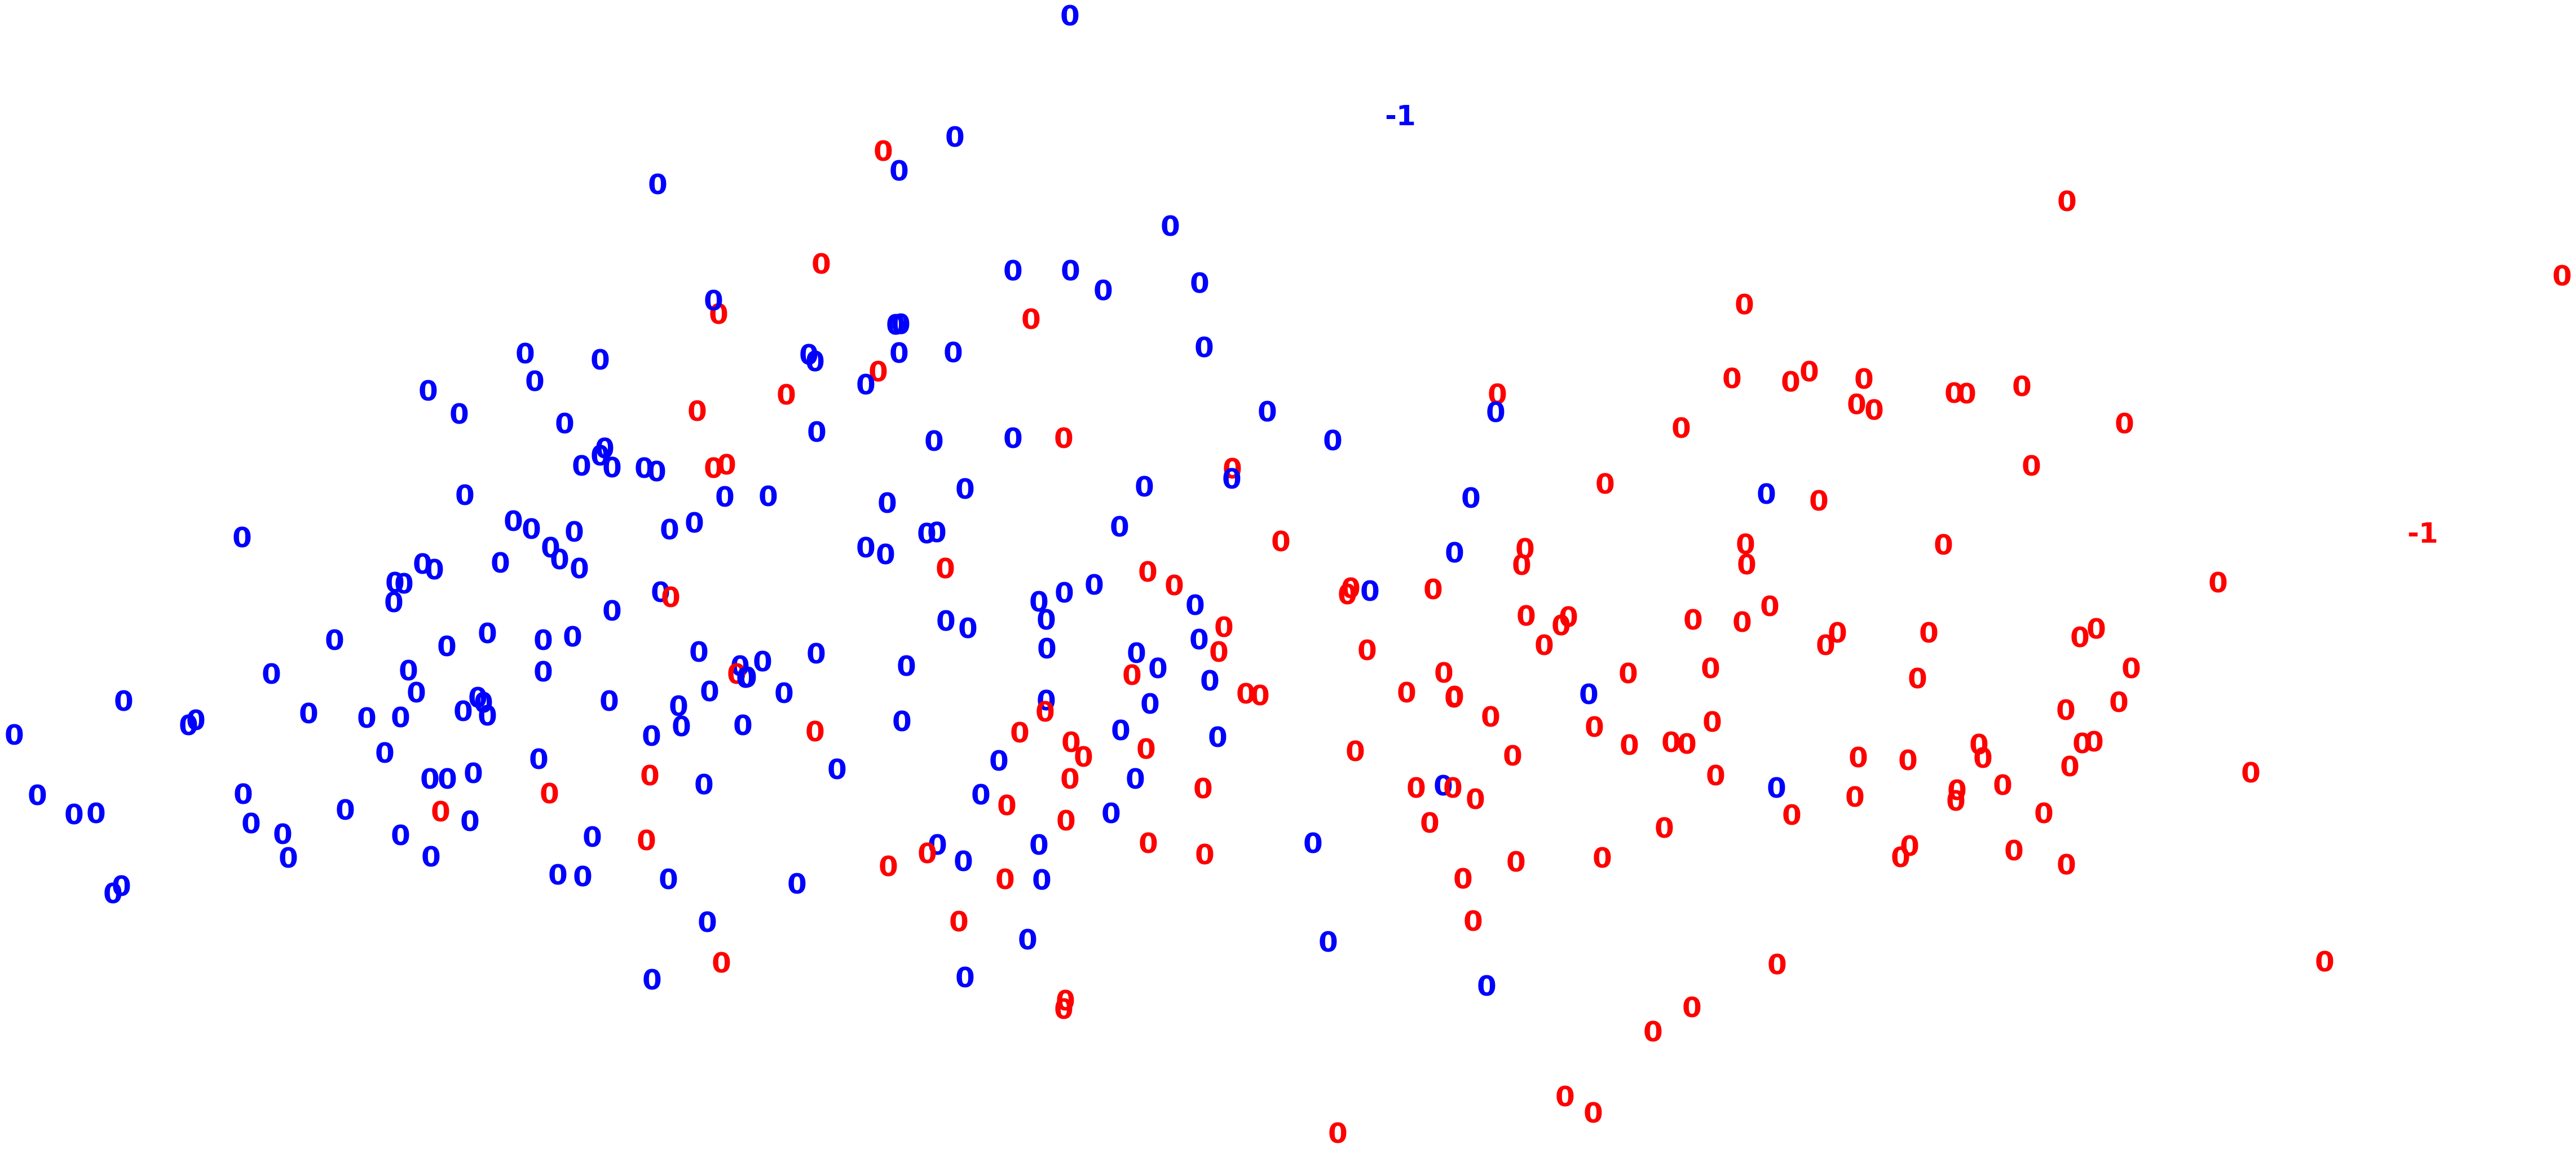

In [12]:
eps = 1
samp = 2
for i in range(1, 5):
    dbscan_cluster = DBSCAN(eps=eps, min_samples=samp)
    clusters = dbscan_cluster.fit_predict(X_std)
    sils.append([metrics.silhouette_score(X, clusters), eps, samp])
    aris.append([metrics.adjusted_rand_score(y, clusters), eps, samp])
    print(sils)
    print(aris)
    
    pca = PCA(n_components=2).fit_transform(X_std)

    plt.figure(figsize=(10,5))
    colours = 'rbg'
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
                 color=colours[y[i]],
                 fontdict={'weight': 'bold', 'size': 50}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    eps += 1
    samp += 1

In [13]:
sils.sort(reverse=True)
aris.sort(reverse=True)

In [14]:
print('Best silhouette score: ' + str(sils[0]))
print('Best ARI score: ' + str(aris[0]))

Best silhouette score: [0.6484534366294585, 4, 5]
Best ARI score: [0.02347593686222429, 2, 3]


# 2) Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of min_samples. When you increase the value of min_samples, how does that affect the number of clusters that DBSCAN identifies?

In [15]:
for i in range(1, 4):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric='euclidean')
    clusters = dbscan_cluster.fit_predict(X_std)
    print(metrics.silhouette_score(X, clusters))
    print(metrics.adjusted_rand_score(y, clusters))

    print(clusters)

-0.017248159188903423
0.0004340648309851829
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  29  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132  11 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
  25 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 162 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 192 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 22

# 3) Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then increase the value of eps. When you increase the value of eps, how does that affect the number of clusters that DBSCAN identifies?

In [16]:
for i in range(1, 5):
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric='euclidean')
    clusters = dbscan_cluster.fit_predict(X_std)
    print(metrics.silhouette_score(X, clusters))
    print(metrics.adjusted_rand_score(y, clusters))

    print(clusters)

-0.017248159188903423
0.0004340648309851829
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  29  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132  11 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
  25 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 162 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 192 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 22